In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\narve\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [87]:
sale=pd.read_excel("F:/project/tidyquant/sales.xlsx")

In [3]:
sale

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
0,PPL.15302JSB/07M,Loc 2,Brand B,1,8190,6552.00,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BRW,SS,SLV,0.0
1,PPL.14378JSR/12P,Loc 9,Brand B,1,7490,5243.00,CARRYOVER,ICONIC,MALE,SS,RGD,ROUND,ANALOG,BRW,RUBBER,BRW,0.0
2,PPL.15366JS/03M,Loc 18,Brand B,1,7290,4257.36,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BLU,SS,SLV,0.0
3,PPL.15001JSB/02MA,Loc 9,Brand B,1,7590,5313.00,CARRYOVER,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,BLK,0.0
4,PPL.14834JSB/03M,Loc 9,Brand B,1,10990,7693.00,DROPPED,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLU,SS,BLK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,TW2R23900,Loc 18,Brand C,1,4490,2914.75,CARRYOVER,CEBU,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.0
14260,TW4B08200,Loc 18,Brand C,1,3790,2460.33,CARRYOVER,CEBU,MALE,RESIN,BLK,ROUND,ANALOG,WHT,FABRIC,BRW,0.0
14261,TW5M14500,Loc 18,Brand C,1,4190,2719.99,CARRYOVER,CEBU,UNISEX,RESIN,BLK,ROUND,DIGITAL,NORMAL,RUBBER,GRY,0.0
14262,TWEG1538E,Loc 18,Brand C,1,3990,2590.16,CARRYOVER,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,BRW,SS,2T GLD SLV,0.0


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14264 entries, 0 to 14263
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU               14264 non-null  object 
 1   LOCATION CODE     14264 non-null  object 
 2   BRAND             14264 non-null  object 
 3   NET SALES UNITS   14264 non-null  int64  
 4   UNIT PRICE        14264 non-null  int64  
 5   INVOICED AMOUNT   14264 non-null  float64
 6   LINE_UP           14264 non-null  object 
 7   CATEGORY          14264 non-null  object 
 8   GENDER            14264 non-null  object 
 9   CASE MATERIAL     14264 non-null  object 
 10  CASE COLOR        14264 non-null  object 
 11  CASE SHAPE        14264 non-null  object 
 12  DIAL TYPE         14264 non-null  object 
 13  DIAL COLOR        14264 non-null  object 
 14  STRAP TYPE        14264 non-null  object 
 15  STRAP COLOR       14264 non-null  object 
 16  ITEM DISC         14264 non-null  float6

# EDA-

In [5]:
sale['SKU']=sale['SKU'].astype('category')
sale['LOCATION CODE']=sale['LOCATION CODE'].astype('category')
sale['BRAND']=sale['BRAND'].astype('category')
sale['LINE_UP']=sale['LINE_UP'].astype('category')
sale['CATEGORY']=sale['CATEGORY'].astype('category')
sale['GENDER']=sale['GENDER'].astype('category')
sale['CASE MATERIAL']=sale['CASE MATERIAL'].astype('category')
sale['CASE COLOR']=sale['CASE COLOR'].astype('category')
sale['CASE SHAPE']=sale['CASE SHAPE'].astype('category')
sale['DIAL TYPE']=sale['DIAL TYPE'].astype('category')
sale['DIAL COLOR']=sale['DIAL COLOR'].astype('category')
sale['STRAP TYPE']=sale['STRAP TYPE'].astype('category')
sale['STRAP COLOR']=sale['STRAP COLOR'].astype('category')

In [6]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14264 entries, 0 to 14263
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SKU               14264 non-null  category
 1   LOCATION CODE     14264 non-null  category
 2   BRAND             14264 non-null  category
 3   NET SALES UNITS   14264 non-null  int64   
 4   UNIT PRICE        14264 non-null  int64   
 5   INVOICED AMOUNT   14264 non-null  float64 
 6   LINE_UP           14264 non-null  category
 7   CATEGORY          14264 non-null  category
 8   GENDER            14264 non-null  category
 9   CASE MATERIAL     14264 non-null  category
 10  CASE COLOR        14264 non-null  category
 11  CASE SHAPE        14264 non-null  category
 12  DIAL TYPE         14264 non-null  category
 13  DIAL COLOR        14264 non-null  category
 14  STRAP TYPE        14264 non-null  category
 15  STRAP COLOR       14264 non-null  category
 16  ITEM DISC         1426

In [7]:
sale.describe(include='all')

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
count,14264,14264,14264,14264.000000,14264.000000,14264.000000,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264,14264.000000
unique,1179,14,3,NaN,NaN,NaN,6,11,4,6,18,7,3,16,8,18,NaN
top,TW00B303E,Loc 18,Brand C,NaN,NaN,NaN,SPECIALS,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,WHT,SS,GLD,NaN
freq,378,2347,12169,NaN,NaN,NaN,7190,5638,6742,9068,5340,13407,11644,3647,7464,3365,NaN
mean,NaN,NaN,NaN,1.087072,3107.363432,2612.456201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270436
std,NaN,NaN,NaN,0.895816,1665.584357,1894.822630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.242828
min,NaN,NaN,NaN,1.000000,590.000000,469.590000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000,1990.000000,1605.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,2790.000000,2259.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000
75%,NaN,NaN,NaN,1.000000,3890.000000,3217.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000


In [8]:
sale.isnull().sum()

SKU                 0
LOCATION CODE       0
BRAND               0
NET SALES UNITS     0
UNIT PRICE          0
INVOICED AMOUNT     0
LINE_UP             0
CATEGORY            0
GENDER              0
CASE MATERIAL       0
CASE COLOR          0
CASE SHAPE          0
DIAL TYPE           0
DIAL COLOR          0
STRAP TYPE          0
STRAP COLOR         0
ITEM DISC           0
dtype: int64

In [9]:
df_num = sale.select_dtypes(include = ['float64', 'int64'])

# Correlation Plot

In [10]:
cor=sale.corr()
cor
cor.style.background_gradient(cmap='coolwarm')

,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,ITEM DISC
NET SALES UNITS,1.000000,-0.050504,0.665743,0.040423
UNIT PRICE,-0.050504,1.000000,0.615505,-0.677143
INVOICED AMOUNT,0.665743,0.615505,1.000000,-0.406101
ITEM DISC,0.040423,-0.677143,-0.406101,1.000000


# Bartlett Test

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num)
chi_square_value, p_value



(37424.3454330893, 0.0)

# KMO

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num)
kmo_model

0.40677074110445766

# Visualization of Categorical and Continous

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192DF888448>,
      dtype=object)

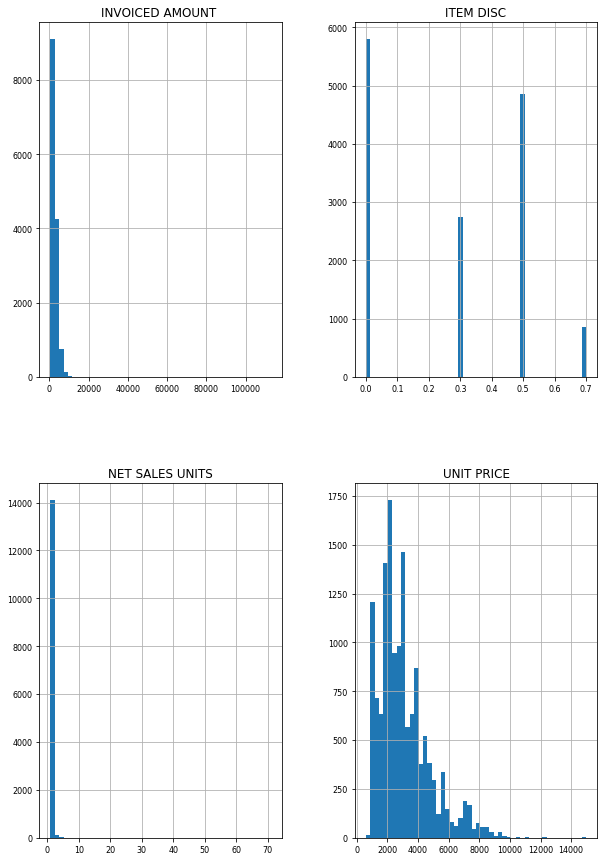

In [13]:
df_num.hist(figsize=(10,15), bins=50, xlabelsize=8, ylabelsize=8)

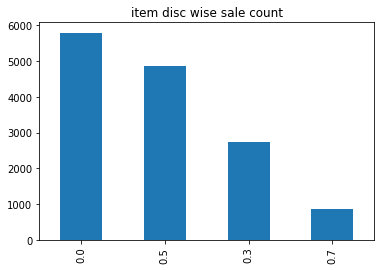

In [14]:
sale['ITEM DISC'].value_counts().plot.bar(title='item disc wise sale count')

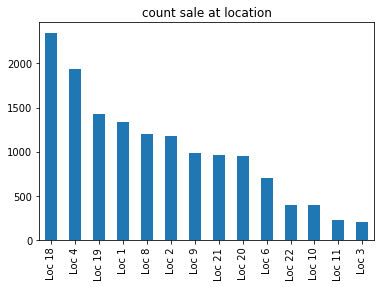

In [15]:
#this graph show count of location sale from 14264 observation
#loc 18 show highest sale
sale['LOCATION CODE'].value_counts().plot.bar(title='count sale at location')


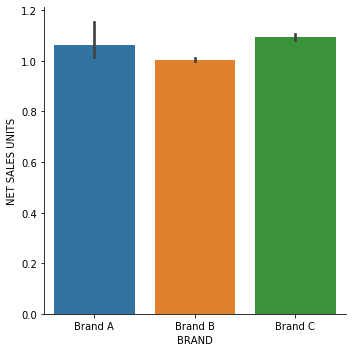

In [17]:
sns.catplot(x="BRAND", y="NET SALES UNITS", kind="bar", data=sale)

<Figure size 1440x3600 with 0 Axes>

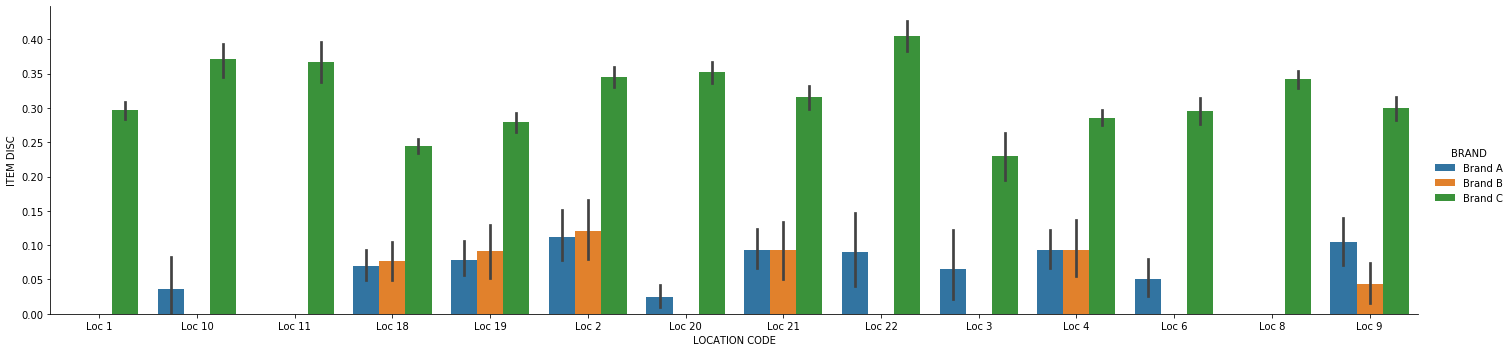

In [18]:
plt.figure(figsize=(20,50))
sns.catplot(x="LOCATION CODE", y="ITEM DISC",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);

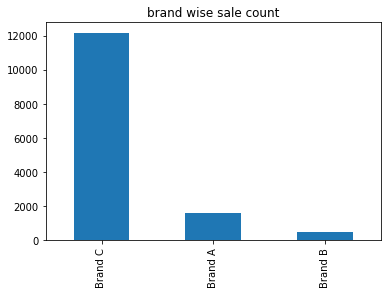

In [19]:
sale['BRAND'].value_counts().plot.bar(title='brand wise sale count')

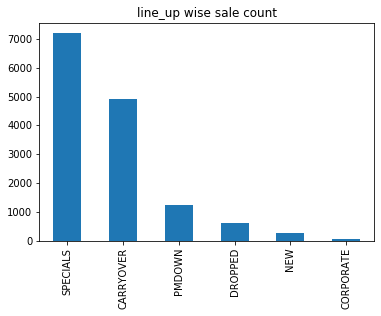

In [20]:
sale['LINE_UP'].value_counts().plot.bar(title='line_up wise sale count')

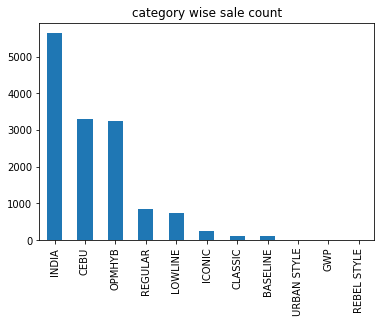

In [21]:
sale['CATEGORY'].value_counts().plot.bar(title='category wise sale count')

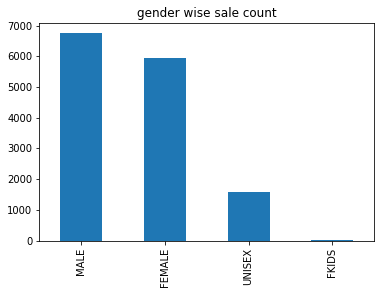

In [22]:
sale['GENDER'].value_counts().plot.bar(title='gender wise sale count')

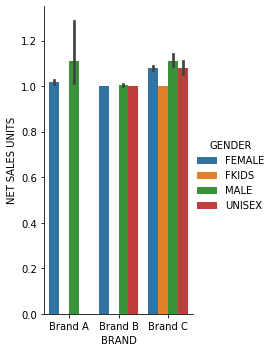

In [23]:
sns.catplot(x="BRAND", y="NET SALES UNITS", hue="GENDER", aspect=.6,
            kind="bar", data=sale);

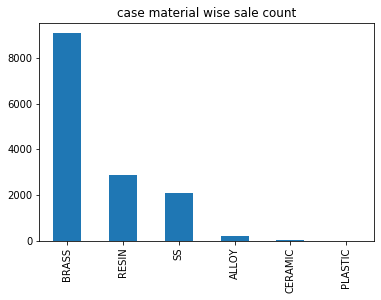

In [24]:
sale['CASE MATERIAL'].value_counts().plot.bar(title='case material wise sale count')

<Figure size 1440x3600 with 0 Axes>

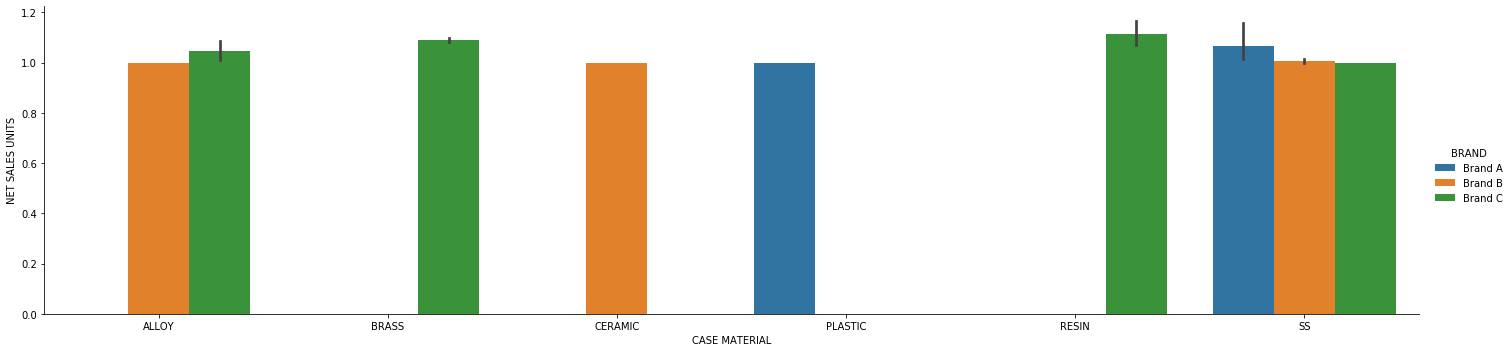

In [25]:
plt.figure(figsize=(20,50))
sns.catplot(x="CASE MATERIAL", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);
# graph show net sales of CASE MATERIAL brand wise
#in brand C CASE MATERIAL RESIN highest sale
#in brand B CASE MATERIAL SS and CERAMIC highest sales
#in brand A CASE MATERIAL SS highest sales


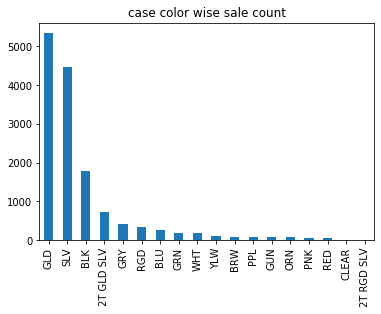

In [26]:
sale['CASE COLOR'].value_counts().plot.bar(title='case color wise sale count')


<Figure size 1440x3600 with 0 Axes>

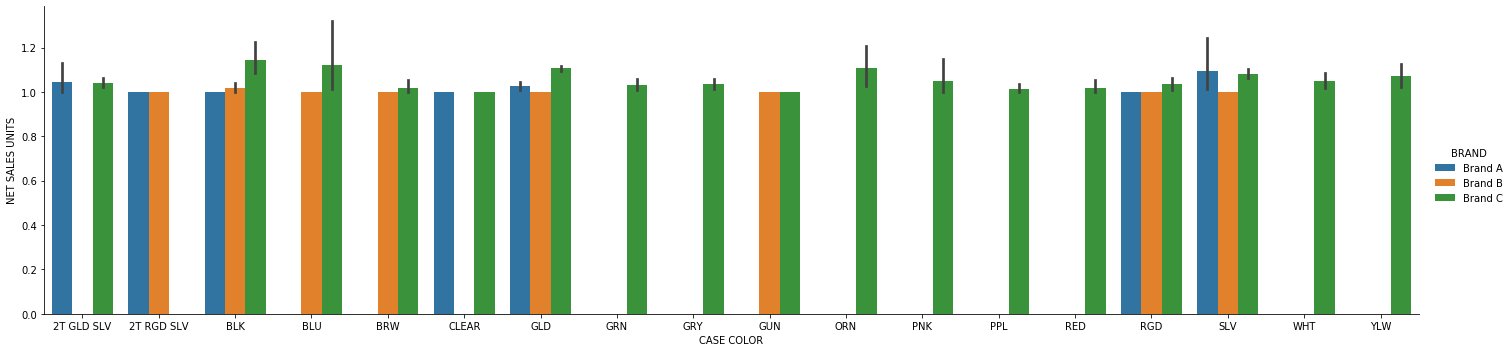

In [27]:
plt.figure(figsize=(20,50))
sns.catplot(x="CASE COLOR", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);
# graph show net sales of CASE COLOR brand wise
#in brand C CASE COLOR ORN highest sale
#in brand B CASE COLOR BLK highest sales
#in brand A CASE COLOR SLV highest sales

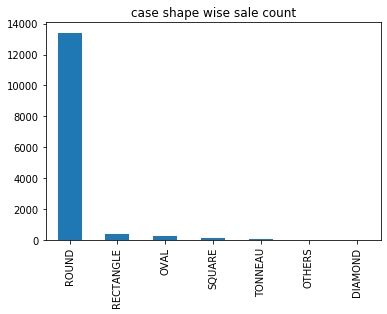

In [28]:
sale['CASE SHAPE'].value_counts().plot.bar(title='case shape wise sale count')


<Figure size 1440x3600 with 0 Axes>

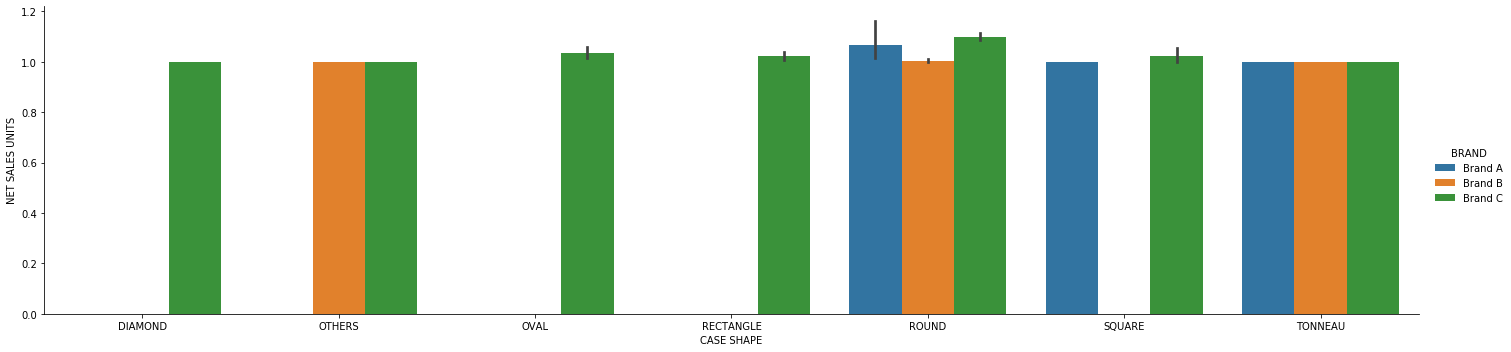

In [29]:
plt.figure(figsize=(20,50))
sns.catplot(x="CASE SHAPE", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);
# graph show net sales of CASE SHAPE brand wise
#in brand C CASE SHAPE Round highest sale
#in brand B CASE SHAPE Round highest sales
#in brand A CASE SHAPE Round highest sales

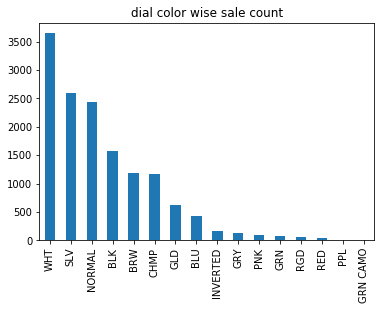

In [30]:
sale['DIAL COLOR'].value_counts().plot.bar(title='dial color wise sale count')


<Figure size 1440x3600 with 0 Axes>

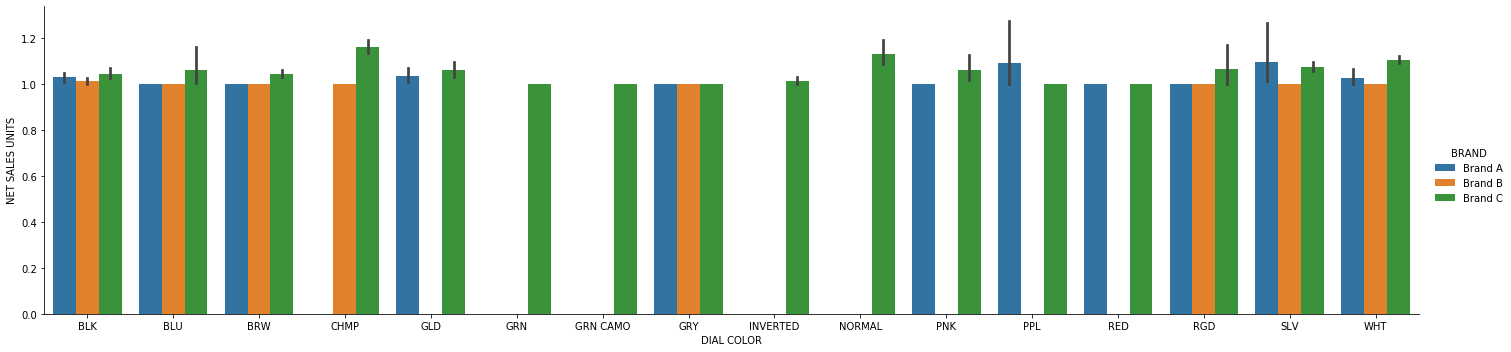

In [31]:
plt.figure(figsize=(20,50))
sns.catplot(x="DIAL COLOR", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);
# graph show net sales of Dial color brand wise
#in brand C dial color CHMP highest sale
#in brand B dial color BLK highest sales
#in brand A dial color SLV highest sales


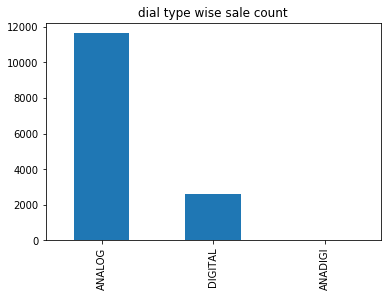

In [32]:
sale['DIAL TYPE'].value_counts().plot.bar(title='dial type wise sale count')


<Figure size 1440x3600 with 0 Axes>

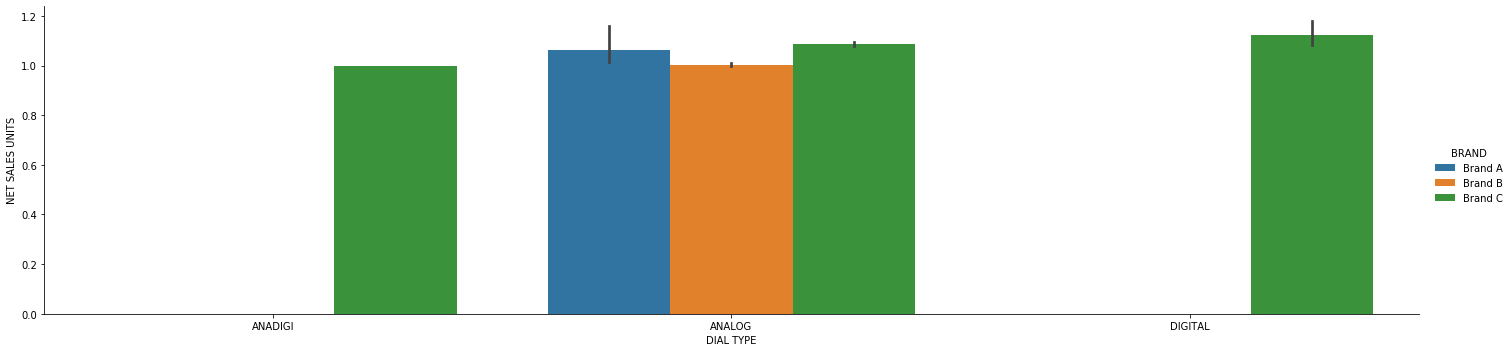

In [33]:
plt.figure(figsize=(20,50))
sns.catplot(x="DIAL TYPE", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);

# graph show net sales of Dial type brand wise
#in brand C dial type Digital highest sale
#in brand B dial type Analog highest sales
#in brand A dial type Analog highest sales

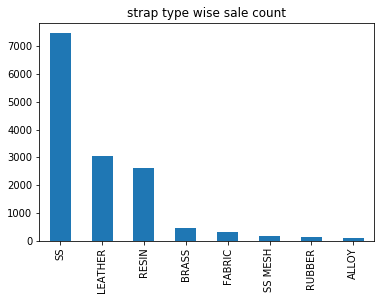

In [34]:
sale['STRAP TYPE'].value_counts().plot.bar(title='strap type wise sale count')


<Figure size 1440x3600 with 0 Axes>

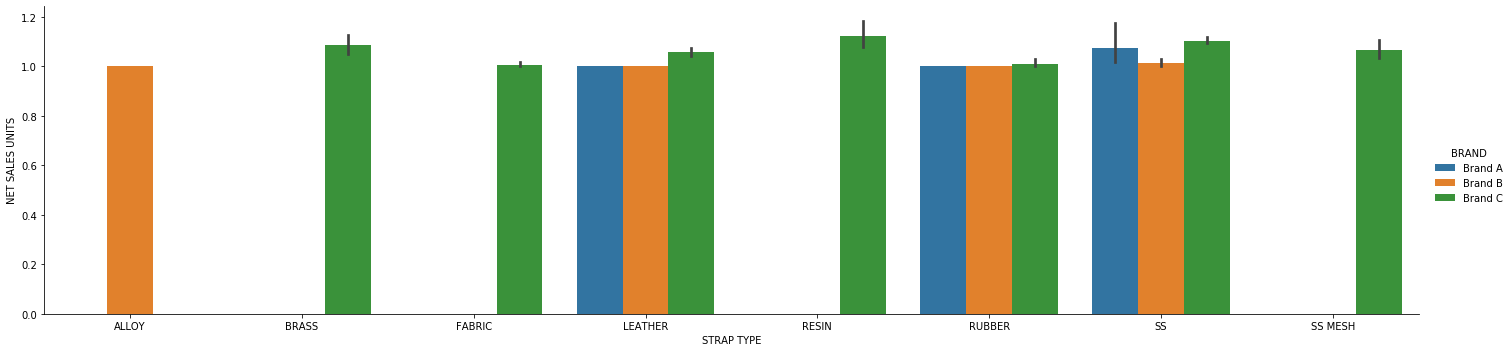

In [35]:
plt.figure(figsize=(20,50))
sns.catplot(x="STRAP TYPE", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);
# graph show net sales of strap type brand wise
#in brand C strap type Resin highest sales
#in brand B stap type SS highest sales
#in brand A stap type SS highest sales


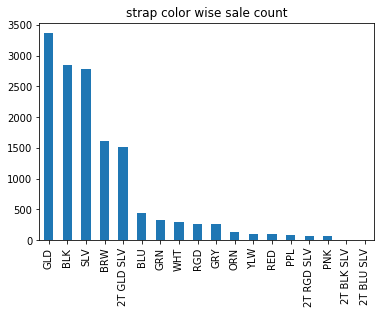

In [36]:
sale['STRAP COLOR'].value_counts().plot.bar(title='strap color wise sale count')


<Figure size 1440x3600 with 0 Axes>

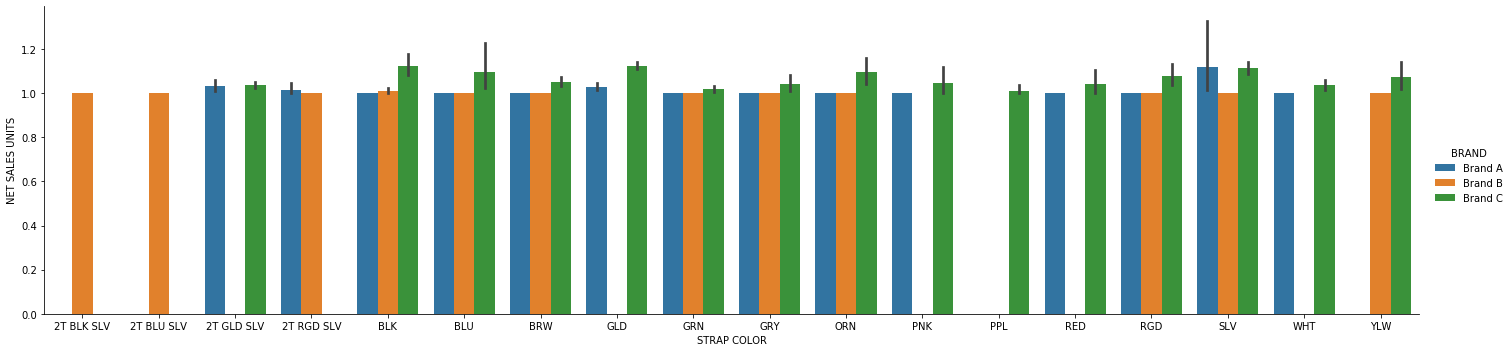

In [37]:
plt.figure(figsize=(20,50))
sns.catplot(x="STRAP COLOR", y="NET SALES UNITS",hue="BRAND", aspect=4, height=5,
            kind="bar", data=sale);

# graph show net sales of strap color brand wise
#in brand C strap color GLD and BLK highest sales
#in brand B stap color BLK, 2T BLU, 2T BLK highest sales
#in brand A stap color SLV highest sales


In [38]:
brandc=sale[sale['BRAND']=='Brand C']

In [39]:
brandc

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
2095,T2Z601,Loc 2,Brand C,1,1640,1640.00,SPECIALS,INDIA,UNISEX,BRASS,GLD,ROUND,ANALOG,WHT,LEATHER,BLK,0.5
2096,TW000T606,Loc 2,Brand C,1,2790,3990.00,PMDOWN,INDIA,FEMALE,BRASS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3
2097,TW00A301E,Loc 2,Brand C,1,1740,1740.00,SPECIALS,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,CHMP,LEATHER,BRW,0.5
2098,TW00CS15E,Loc 2,Brand C,1,2240,2240.00,SPECIALS,INDIA,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,GLD,SS,2T GLD SLV,0.5
2099,TW2P76500,Loc 2,Brand C,1,3350,3350.00,SPECIALS,OPMHYB,MALE,BRASS,GLD,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,TW2R23900,Loc 18,Brand C,1,4490,2914.75,CARRYOVER,CEBU,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.0
14260,TW4B08200,Loc 18,Brand C,1,3790,2460.33,CARRYOVER,CEBU,MALE,RESIN,BLK,ROUND,ANALOG,WHT,FABRIC,BRW,0.0
14261,TW5M14500,Loc 18,Brand C,1,4190,2719.99,CARRYOVER,CEBU,UNISEX,RESIN,BLK,ROUND,DIGITAL,NORMAL,RUBBER,GRY,0.0
14262,TWEG1538E,Loc 18,Brand C,1,3990,2590.16,CARRYOVER,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,BRW,SS,2T GLD SLV,0.0


In [40]:
brandb=sale[sale['BRAND']=='Brand B']

In [41]:
brandb

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
0,PPL.15302JSB/07M,Loc 2,Brand B,1,8190,6552.00,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BRW,SS,SLV,0.0
1,PPL.14378JSR/12P,Loc 9,Brand B,1,7490,5243.00,CARRYOVER,ICONIC,MALE,SS,RGD,ROUND,ANALOG,BRW,RUBBER,BRW,0.0
2,PPL.15366JS/03M,Loc 18,Brand B,1,7290,4257.36,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BLU,SS,SLV,0.0
3,PPL.15001JSB/02MA,Loc 9,Brand B,1,7590,5313.00,CARRYOVER,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,BLK,0.0
4,PPL.14834JSB/03M,Loc 9,Brand B,1,10990,7693.00,DROPPED,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLU,SS,BLK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,PPL.14796JS/61,Loc 21,Brand B,1,3445,2322.60,PMDOWN,ICONIC,MALE,SS,SLV,TONNEAU,ANALOG,GRY,LEATHER,BLK,0.5
489,PPL.15388JSTB/04M,Loc 18,Brand B,1,7390,4855.23,DROPPED,ICONIC,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.0
490,PPL.15525JSTB/02M,Loc 18,Brand B,1,8990,5906.43,NEW,URBAN STYLE,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,2T BLK SLV,0.0
491,PPL.14536JSBN/02,Loc 18,Brand B,1,9490,6234.93,CARRYOVER,ICONIC,MALE,SS,BRW,ROUND,ANALOG,BLK,LEATHER,BRW,0.0


In [42]:
branda=sale[sale['BRAND']=='Brand A']

In [43]:
branda

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
493,AE1242-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3
494,AE1243-0103,Loc 3,Brand A,1,1890,1305.80,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.0
495,AE2243-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,FEMALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3
496,AE2245-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,FEMALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3
497,AL2259-1812,Loc 3,Brand A,1,4890,3378.51,CARRYOVER,REGULAR,FEMALE,SS,RGD,ROUND,ANALOG,RGD,SS,RGD,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,AE1247-1216,Loc 19,Brand A,1,2890,2109.70,CARRYOVER,LOWLINE,MALE,SS,GLD,ROUND,ANALOG,GLD,SS,GLD,0.0
2091,AE1248A-0102,Loc 19,Brand A,1,1590,1160.70,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,BLK,SS,SLV,0.0
2092,AH1269-0201,Loc 19,Brand A,1,3590,2620.70,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,LEATHER,BLK,0.0
2093,AE2302-0110,Loc 18,Brand A,1,2890,2109.70,CARRYOVER,REGULAR,FEMALE,SS,SLV,ROUND,ANALOG,PPL,SS,SLV,0.0


In [44]:
clustera=branda.iloc[:,3:6]
clusterb=brandb.iloc[:,3:6]
clusterc=brandc.iloc[:,3:6]


In [45]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm 

# CLUSTERING FOR BRAND A ON BASIS OF NET SALES UNIT, INVOICED AMOUNT, UNIT PRICE

In [46]:
scaler = StandardScaler()

# fit_transform
salesclustera = scaler.fit_transform(clustera)
salesclustera.shape

(1602, 3)

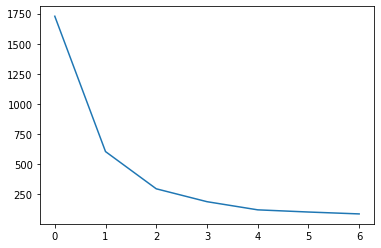

In [47]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(salesclustera)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [48]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(salesclustera)
pred = kmeans.predict(salesclustera)

In [49]:
branda['Cluster'] = kmeans.labels_
branda['Cluster'].value_counts()

C:\Users\narve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    894
2    707
1      1
Name: Cluster, dtype: int64

In [50]:
branda

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC,Cluster
493,AE1242-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3,2
494,AE1243-0103,Loc 3,Brand A,1,1890,1305.80,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.0,2
495,AE2243-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,FEMALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3,2
496,AE2245-0103,Loc 3,Brand A,1,1890,1305.80,PMDOWN,LOWLINE,FEMALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3,2
497,AL2259-1812,Loc 3,Brand A,1,4890,3378.51,CARRYOVER,REGULAR,FEMALE,SS,RGD,ROUND,ANALOG,RGD,SS,RGD,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,AE1247-1216,Loc 19,Brand A,1,2890,2109.70,CARRYOVER,LOWLINE,MALE,SS,GLD,ROUND,ANALOG,GLD,SS,GLD,0.0,0
2091,AE1248A-0102,Loc 19,Brand A,1,1590,1160.70,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,BLK,SS,SLV,0.0,2
2092,AH1269-0201,Loc 19,Brand A,1,3590,2620.70,CARRYOVER,LOWLINE,MALE,SS,SLV,ROUND,ANALOG,SLV,LEATHER,BLK,0.0,0
2093,AE2302-0110,Loc 18,Brand A,1,2890,2109.70,CARRYOVER,REGULAR,FEMALE,SS,SLV,ROUND,ANALOG,PPL,SS,SLV,0.0,0


# CLUSTERING FOR BRAND B ON BASIS OF NET SALES UNIT, INVOICED AMOUNT, UNIT PRICE

In [51]:
scaler = StandardScaler()

# fit_transform
salesclusterb = scaler.fit_transform(clusterb)
salesclusterb.shape

(493, 3)

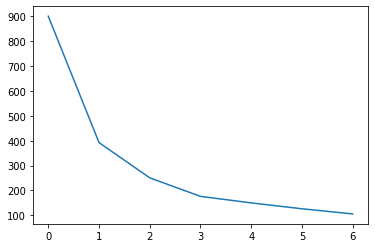

In [52]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(salesclusterb)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [53]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(salesclusterb)
pred = kmeans.predict(salesclusterb)

In [54]:
brandb['Cluster'] = kmeans.labels_
brandb['Cluster'].value_counts()

C:\Users\narve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    254
0    237
2      2
Name: Cluster, dtype: int64

In [55]:
brandb

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC,Cluster
0,PPL.15302JSB/07M,Loc 2,Brand B,1,8190,6552.00,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BRW,SS,SLV,0.0,1
1,PPL.14378JSR/12P,Loc 9,Brand B,1,7490,5243.00,CARRYOVER,ICONIC,MALE,SS,RGD,ROUND,ANALOG,BRW,RUBBER,BRW,0.0,1
2,PPL.15366JS/03M,Loc 18,Brand B,1,7290,4257.36,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BLU,SS,SLV,0.0,1
3,PPL.15001JSB/02MA,Loc 9,Brand B,1,7590,5313.00,CARRYOVER,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,BLK,0.0,1
4,PPL.14834JSB/03M,Loc 9,Brand B,1,10990,7693.00,DROPPED,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLU,SS,BLK,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,PPL.14796JS/61,Loc 21,Brand B,1,3445,2322.60,PMDOWN,ICONIC,MALE,SS,SLV,TONNEAU,ANALOG,GRY,LEATHER,BLK,0.5,0
489,PPL.15388JSTB/04M,Loc 18,Brand B,1,7390,4855.23,DROPPED,ICONIC,MALE,SS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.0,1
490,PPL.15525JSTB/02M,Loc 18,Brand B,1,8990,5906.43,NEW,URBAN STYLE,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,2T BLK SLV,0.0,1
491,PPL.14536JSBN/02,Loc 18,Brand B,1,9490,6234.93,CARRYOVER,ICONIC,MALE,SS,BRW,ROUND,ANALOG,BLK,LEATHER,BRW,0.0,1


# CLUSTERING FOR BRAND C ON BASIS OF NET SALES UNIT, INVOICED AMOUNT, UNIT PRICE

In [56]:
scaler = StandardScaler()

# fit_transform
salesclusterc = scaler.fit_transform(clusterc)
salesclusterc.shape

(12169, 3)

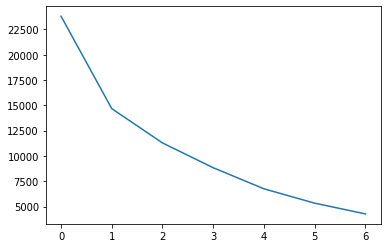

In [57]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(salesclusterc)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [58]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(salesclusterc)
pred = kmeans.predict(salesclusterc)

In [59]:
brandc['Cluster'] = kmeans.labels_
brandc['Cluster'].value_counts()

C:\Users\narve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    8860
1    3305
2       4
Name: Cluster, dtype: int64

In [60]:
brandc

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC,Cluster
2095,T2Z601,Loc 2,Brand C,1,1640,1640.00,SPECIALS,INDIA,UNISEX,BRASS,GLD,ROUND,ANALOG,WHT,LEATHER,BLK,0.5,0
2096,TW000T606,Loc 2,Brand C,1,2790,3990.00,PMDOWN,INDIA,FEMALE,BRASS,SLV,ROUND,ANALOG,SLV,SS,SLV,0.3,0
2097,TW00A301E,Loc 2,Brand C,1,1740,1740.00,SPECIALS,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,CHMP,LEATHER,BRW,0.5,0
2098,TW00CS15E,Loc 2,Brand C,1,2240,2240.00,SPECIALS,INDIA,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,GLD,SS,2T GLD SLV,0.5,0
2099,TW2P76500,Loc 2,Brand C,1,3350,3350.00,SPECIALS,OPMHYB,MALE,BRASS,GLD,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,TW2R23900,Loc 18,Brand C,1,4490,2914.75,CARRYOVER,CEBU,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.0,1
14260,TW4B08200,Loc 18,Brand C,1,3790,2460.33,CARRYOVER,CEBU,MALE,RESIN,BLK,ROUND,ANALOG,WHT,FABRIC,BRW,0.0,0
14261,TW5M14500,Loc 18,Brand C,1,4190,2719.99,CARRYOVER,CEBU,UNISEX,RESIN,BLK,ROUND,DIGITAL,NORMAL,RUBBER,GRY,0.0,1
14262,TWEG1538E,Loc 18,Brand C,1,3990,2590.16,CARRYOVER,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,BRW,SS,2T GLD SLV,0.0,0


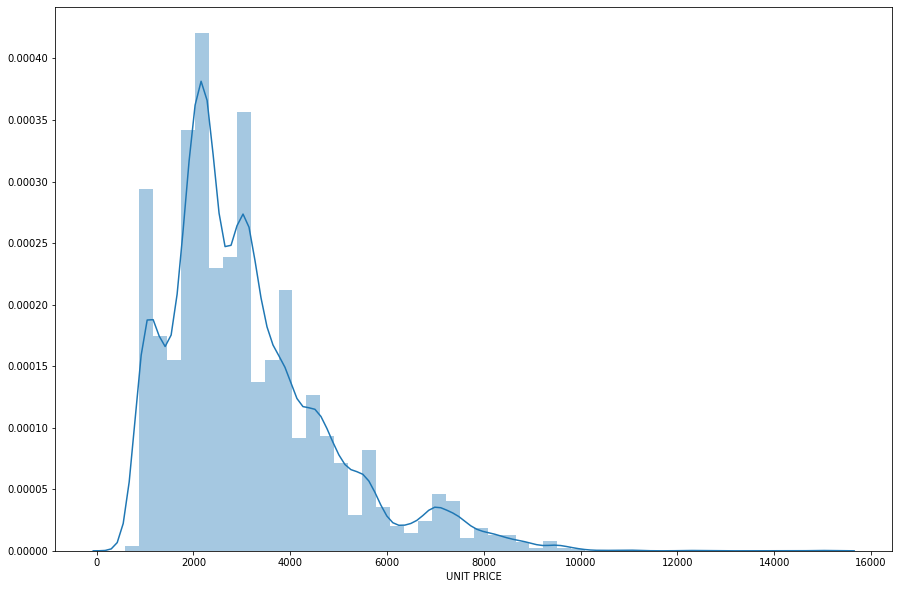

In [61]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(sale['UNIT PRICE'])

# Model for Business Optimization 

In [62]:
sales=sale.copy()

In [63]:
sales

,SKU,LOCATION CODE,BRAND,NET SALES UNITS,UNIT PRICE,INVOICED AMOUNT,LINE_UP,CATEGORY,GENDER,CASE MATERIAL,CASE COLOR,CASE SHAPE,DIAL TYPE,DIAL COLOR,STRAP TYPE,STRAP COLOR,ITEM DISC
0,PPL.15302JSB/07M,Loc 2,Brand B,1,8190,6552.00,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BRW,SS,SLV,0.0
1,PPL.14378JSR/12P,Loc 9,Brand B,1,7490,5243.00,CARRYOVER,ICONIC,MALE,SS,RGD,ROUND,ANALOG,BRW,RUBBER,BRW,0.0
2,PPL.15366JS/03M,Loc 18,Brand B,1,7290,4257.36,CARRYOVER,ICONIC,MALE,SS,SLV,ROUND,ANALOG,BLU,SS,SLV,0.0
3,PPL.15001JSB/02MA,Loc 9,Brand B,1,7590,5313.00,CARRYOVER,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLK,SS,BLK,0.0
4,PPL.14834JSB/03M,Loc 9,Brand B,1,10990,7693.00,DROPPED,ICONIC,MALE,SS,BLK,ROUND,ANALOG,BLU,SS,BLK,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14259,TW2R23900,Loc 18,Brand C,1,4490,2914.75,CARRYOVER,CEBU,FEMALE,BRASS,2T GLD SLV,ROUND,ANALOG,WHT,SS,2T GLD SLV,0.0
14260,TW4B08200,Loc 18,Brand C,1,3790,2460.33,CARRYOVER,CEBU,MALE,RESIN,BLK,ROUND,ANALOG,WHT,FABRIC,BRW,0.0
14261,TW5M14500,Loc 18,Brand C,1,4190,2719.99,CARRYOVER,CEBU,UNISEX,RESIN,BLK,ROUND,DIGITAL,NORMAL,RUBBER,GRY,0.0
14262,TWEG1538E,Loc 18,Brand C,1,3990,2590.16,CARRYOVER,INDIA,MALE,BRASS,GLD,ROUND,ANALOG,BRW,SS,2T GLD SLV,0.0


In [64]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
sales['SKU'] = lb_make.fit_transform(sales['SKU'])
sales['LOCATION CODE'] = lb_make.fit_transform(sales['LOCATION CODE'])
sales['BRAND'] = lb_make.fit_transform(sales['BRAND'])
sales['LINE_UP'] = lb_make.fit_transform(sales['LINE_UP'])
sales['GENDER'] = lb_make.fit_transform(sales['GENDER'])
sales['CASE MATERIAL'] = lb_make.fit_transform(sales['CASE MATERIAL'])
sales['CATEGORY'] = lb_make.fit_transform(sales['CATEGORY'])
sales['STRAP COLOR'] = lb_make.fit_transform(sales['STRAP COLOR'])
sales['CASE COLOR'] = lb_make.fit_transform(sales['CASE COLOR'])
sales['CASE SHAPE'] = lb_make.fit_transform(sales['CASE SHAPE'])
sales['STRAP TYPE'] = lb_make.fit_transform(sales['STRAP TYPE'])
sales['DIAL TYPE'] = lb_make.fit_transform(sales['DIAL TYPE'])
sales['DIAL COLOR'] = lb_make.fit_transform(sales['DIAL COLOR'])

In [65]:
X_try = sales.loc[:, sales.columns != 'UNIT PRICE'].values
X_try


array([[2.770e+02, 5.000e+00, 1.000e+00, ..., 6.000e+00, 1.500e+01,
        0.000e+00],
       [2.210e+02, 1.300e+01, 1.000e+00, ..., 5.000e+00, 6.000e+00,
        0.000e+00],
       [2.860e+02, 3.000e+00, 1.000e+00, ..., 6.000e+00, 1.500e+01,
        0.000e+00],
       ...,
       [1.107e+03, 3.000e+00, 2.000e+00, ..., 5.000e+00, 9.000e+00,
        0.000e+00],
       [1.147e+03, 3.000e+00, 2.000e+00, ..., 6.000e+00, 2.000e+00,
        0.000e+00],
       [7.970e+02, 1.000e+01, 2.000e+00, ..., 6.000e+00, 7.000e+00,
        0.000e+00]])

In [66]:
y_try= sales.iloc[:,4].values
y_try

array([8190, 7490, 7290, ..., 4190, 3990, 7490], dtype=int64)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_try, y_try, test_size = 0.2, random_state = 0)

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print(lm.intercept_)

3432.7671786836327


In [70]:
predictions = lm.predict(X_test)

In [71]:
X = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X).fit()
prediction = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     3113.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        14:57:28   Log-Likelihood:                -91173.
No. Observations:               11411   AIC:                         1.824e+05
Df Residuals:                   11394   BIC:                         1.825e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3432.7672     93.122     36.863      0.0

In [72]:
sales=sales.drop(['STRAP TYPE','BRAND','GENDER','CASE COLOR','CASE SHAPE','ITEM DISC'], axis=1)


In [73]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14264 entries, 0 to 14263
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SKU               14264 non-null  int32  
 1   LOCATION CODE     14264 non-null  int32  
 2   NET SALES UNITS   14264 non-null  int64  
 3   UNIT PRICE        14264 non-null  int64  
 4   INVOICED AMOUNT   14264 non-null  float64
 5   LINE_UP           14264 non-null  int32  
 6   CATEGORY          14264 non-null  int32  
 7   CASE MATERIAL     14264 non-null  int32  
 8   DIAL TYPE         14264 non-null  int32  
 9   DIAL COLOR        14264 non-null  int32  
 10  STRAP COLOR       14264 non-null  int32  
dtypes: float64(1), int32(8), int64(2)
memory usage: 780.2 KB


In [74]:
sales.columns

Index(['SKU', 'LOCATION CODE', 'NET SALES UNITS', 'UNIT PRICE',
       'INVOICED AMOUNT ', 'LINE_UP', 'CATEGORY', 'CASE MATERIAL', 'DIAL TYPE',
       'DIAL COLOR', 'STRAP COLOR'],
      dtype='object')

In [75]:
X = sales.loc[:, sales.columns != 'UNIT PRICE'].values
X

array([[2.770e+02, 5.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        1.500e+01],
       [2.210e+02, 1.300e+01, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        6.000e+00],
       [2.860e+02, 3.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.500e+01],
       ...,
       [1.107e+03, 3.000e+00, 1.000e+00, ..., 2.000e+00, 9.000e+00,
        9.000e+00],
       [1.147e+03, 3.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        2.000e+00],
       [7.970e+02, 1.000e+01, 1.000e+00, ..., 1.000e+00, 1.400e+01,
        7.000e+00]])

In [76]:
y = sales.iloc[:,3]
y

0         8190
1         7490
2         7290
3         7590
4        10990
         ...  
14259     4490
14260     3790
14261     4190
14262     3990
14263     7490
Name: UNIT PRICE, Length: 14264, dtype: int64

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

3541.2751618125526


In [79]:
predictions = lm.predict(X_test)

In [80]:
X = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X).fit()
prediction = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             UNIT PRICE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     4493.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        14:57:31   Log-Likelihood:                -91649.
No. Observations:               11411   AIC:                         1.833e+05
Df Residuals:                   11400   BIC:                         1.834e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3541.2752     38.341     92.363      0.0

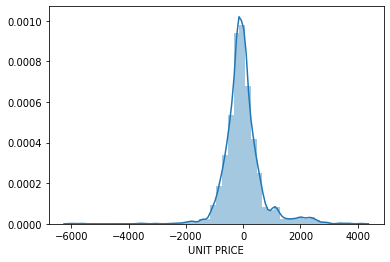

In [81]:
sns.distplot((y_test-predictions),bins=50)

In [82]:
from sklearn import metrics

In [83]:
def mean_absolute_percentage_error(y_test, predictions): 
    """Calculates MAPE given y_test and y_pred"""
    y_test, y_pred = np.array(y_test), np.array(predictions)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mean_absolute_percentage_error(y_test,predictions)

15.279174741369339

In [84]:
accuracy = lm.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 84%'